In [1]:
# Tomasz Brauntsch
# CS 301-101

import numpy as np
import pandas as pd
from sklearn import linear_model

# https://data.cityofnewyork.us/City-Government/Participatory-Budgeting-Projects/wwhr-5ven
# Cost, council, category || Winner

df = pd.read_csv('Participatory_Budgeting_Projects_20231110.csv')

# project #, Description, Address, Winner, BP funding, latitude, longitude, postcode, community board, census tract, BIN,BBL,NTA


In [2]:
# Data Cleanup
df.drop(["Vote Year", "Project Number", "Title", "Description", "Address", "Votes", "BP Funding", "Borough Code", "Latitude", "Longitude", "Postcode", "Community Board", "Census Tract", "BIN", "BBL", "NTA"], axis=1, inplace=True)
df.dropna(how="any", inplace=True)

In [3]:
df

,Council District,Category,Winner,Cost
0,23,Culture and Community Facilities,0,200000.0
1,26,"Streets, Public Safety, Sidewalks and Transpor...",1,100000.0
2,10,"Parks, Environment and Recreation",0,485000.0
3,10,"Streets, Public Safety, Sidewalks and Transpor...",0,200000.0
4,44,Education,1,500000.0
...,...,...,...,...
1458,49,Housing,0,500000.0
1459,49,"Streets, Public Safety, Sidewalks and Transpor...",0,280000.0
1460,49,Housing,0,500000.0
1461,49,"Parks, Environment and Recreation",0,108000.0


In [4]:
# Train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LinearRegression
X=df[['Council District', 'Category', 'Cost']]
y=df['Winner']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=124)

In [5]:
# training data via pipeline
pipe = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                 ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False)),
                 ('model', LinearRegression())])
pipe.fit(X_train, y_train)

# Making Prediction on Training and Test set
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

C:\Users\TomB\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [6]:
y_train_pred
y_test_pred

array([ 5.23437500e-01,  1.80664062e-01,  4.05273438e-01,  2.97851562e-01,
        7.38281250e-01,  2.67578125e-01,  2.18750000e-01,  4.27734375e-01,
        4.22851562e-01,  3.31054688e-01,  2.37304688e-01,  4.97070312e-01,
        9.57031250e-02,  6.59179688e-01,  5.83984375e-01,  4.81445312e-01,
        2.84179688e-01,  3.07617188e-01,  6.98242188e-01,  3.99414062e-01,
        1.26953125e-02,  5.36331950e+11,  5.34179688e-01,  2.84179688e-01,
        4.06250000e-01,  1.43554688e-01,  6.01562500e-01,  2.13867188e-01,
        4.32617188e-01,  3.60351562e-01,  5.92773438e-01,  5.36331950e+11,
        3.60351562e-01,  2.26562500e-01,  5.54687500e-01,  5.36331950e+11,
        2.90039062e-01,  4.41406250e-01,  3.46679688e-01,  2.50976562e-01,
        4.00390625e-01, -5.07812500e-02,  2.50976562e-01,  2.19726562e-01,
        3.59375000e-01,  4.44335938e-01,  3.99414062e-01,  1.26953125e-02,
        3.50585938e-01,  5.01953125e-01,  1.98242188e-01,  1.16210938e-01,
        2.76367188e-01,  

Start on the plotting of data

In [8]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
# # Create a scatter plot
winners = df[df["Winner"] == 1.0]
# fig,axes=plt.subplots()
# tick_spacing = 1
# axes.scatter(winners['Council District'],winners["Winner"])
# fig.tight_layout()
# plt.show()
winners
plt.rcParams["figure.figsize"] = [11.0,5.5]
plt.rcParams["figure.autolayout"] = True

Text(0.5, 1.0, 'Total amount of winners in each categories')

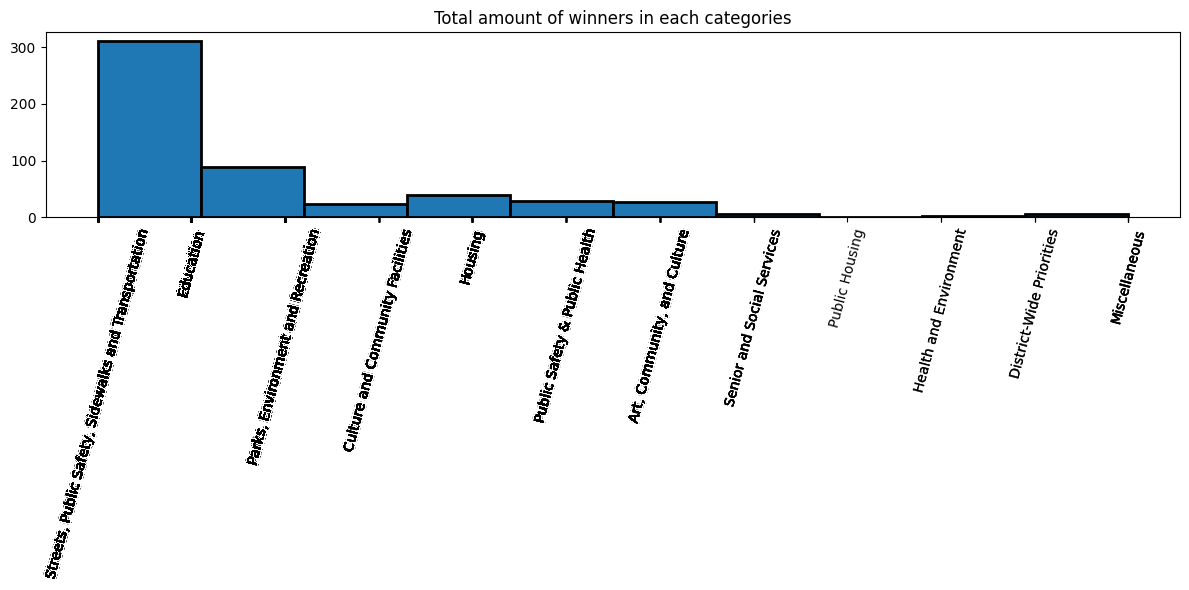

In [9]:
# Total count of winners in said categories
plt.rcParams["figure.figsize"] = [12.0,6.0]
plt.rcParams["figure.autolayout"] = True
plt.hist(winners['Category'], edgecolor="black", linewidth=2)
plt.xticks(winners["Category"], rotation=75, fontsize="medium")
plt.title("Total amount of winners in each categories", fontdict={'fontsize': "large"})

['Streets, Public Safety, Sidewalks and Transportation' 'Education'
 'Parks, Environment and Recreation' 'Culture and Community Facilities'
 'Housing' 'Public Safety & Public Health' 'Art, Community, and Culture'
 'Senior and Social Services' 'Public Housing' 'Health and Environment'
 'District-Wide Priorities' 'Miscellaneous']


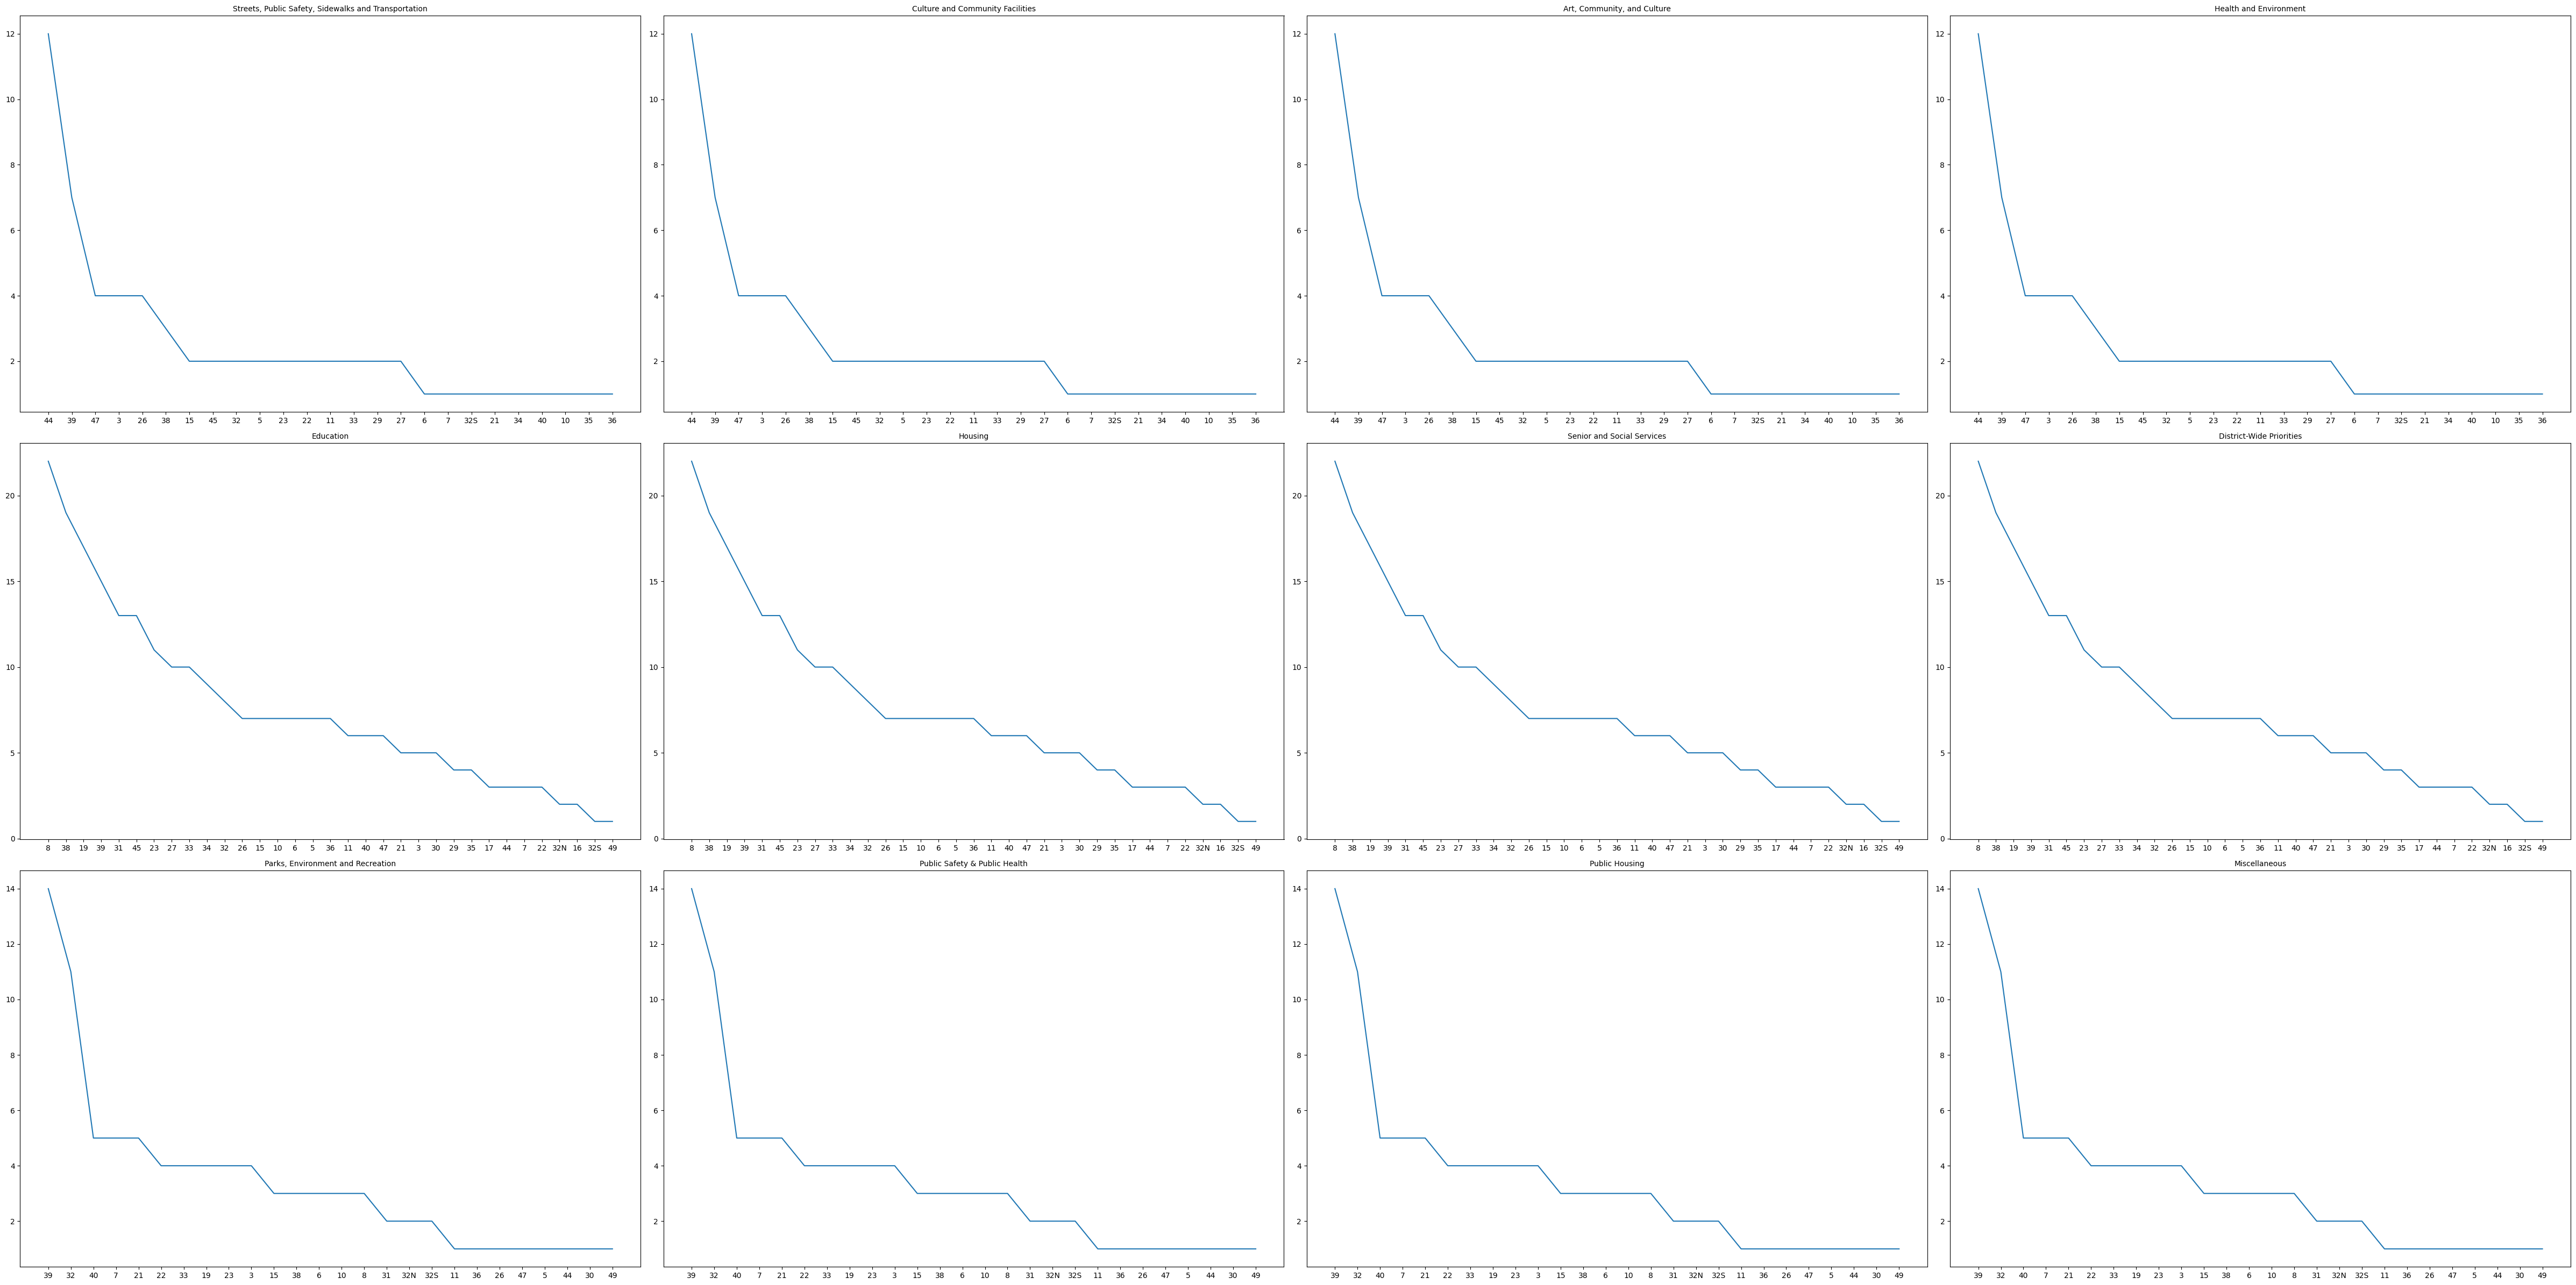

In [10]:
# The best districts for specific categories
plt.rcParams["figure.figsize"] = [48,24.0]
plt.rcParams["figure.autolayout"] = True
fig,axes=plt.subplots(3,4)
unique_cats = winners["Category"].unique()
print(unique_cats)
i = 0
j = 0
for column in unique_cats:
    if(i%3==0 and i != 0):
        j += 1
        i = 0
    current_category = (winners[winners["Category"] == unique_cats[i]])["Council District"].value_counts()
    # get said column then plot the district and the votes from that district for category
    current_df = pd.DataFrame(current_category)
    axes[i][j].plot(current_df["count"])
    axes[i][j].set_title(column, fontsize="medium")
    i += 1


# plt.show()

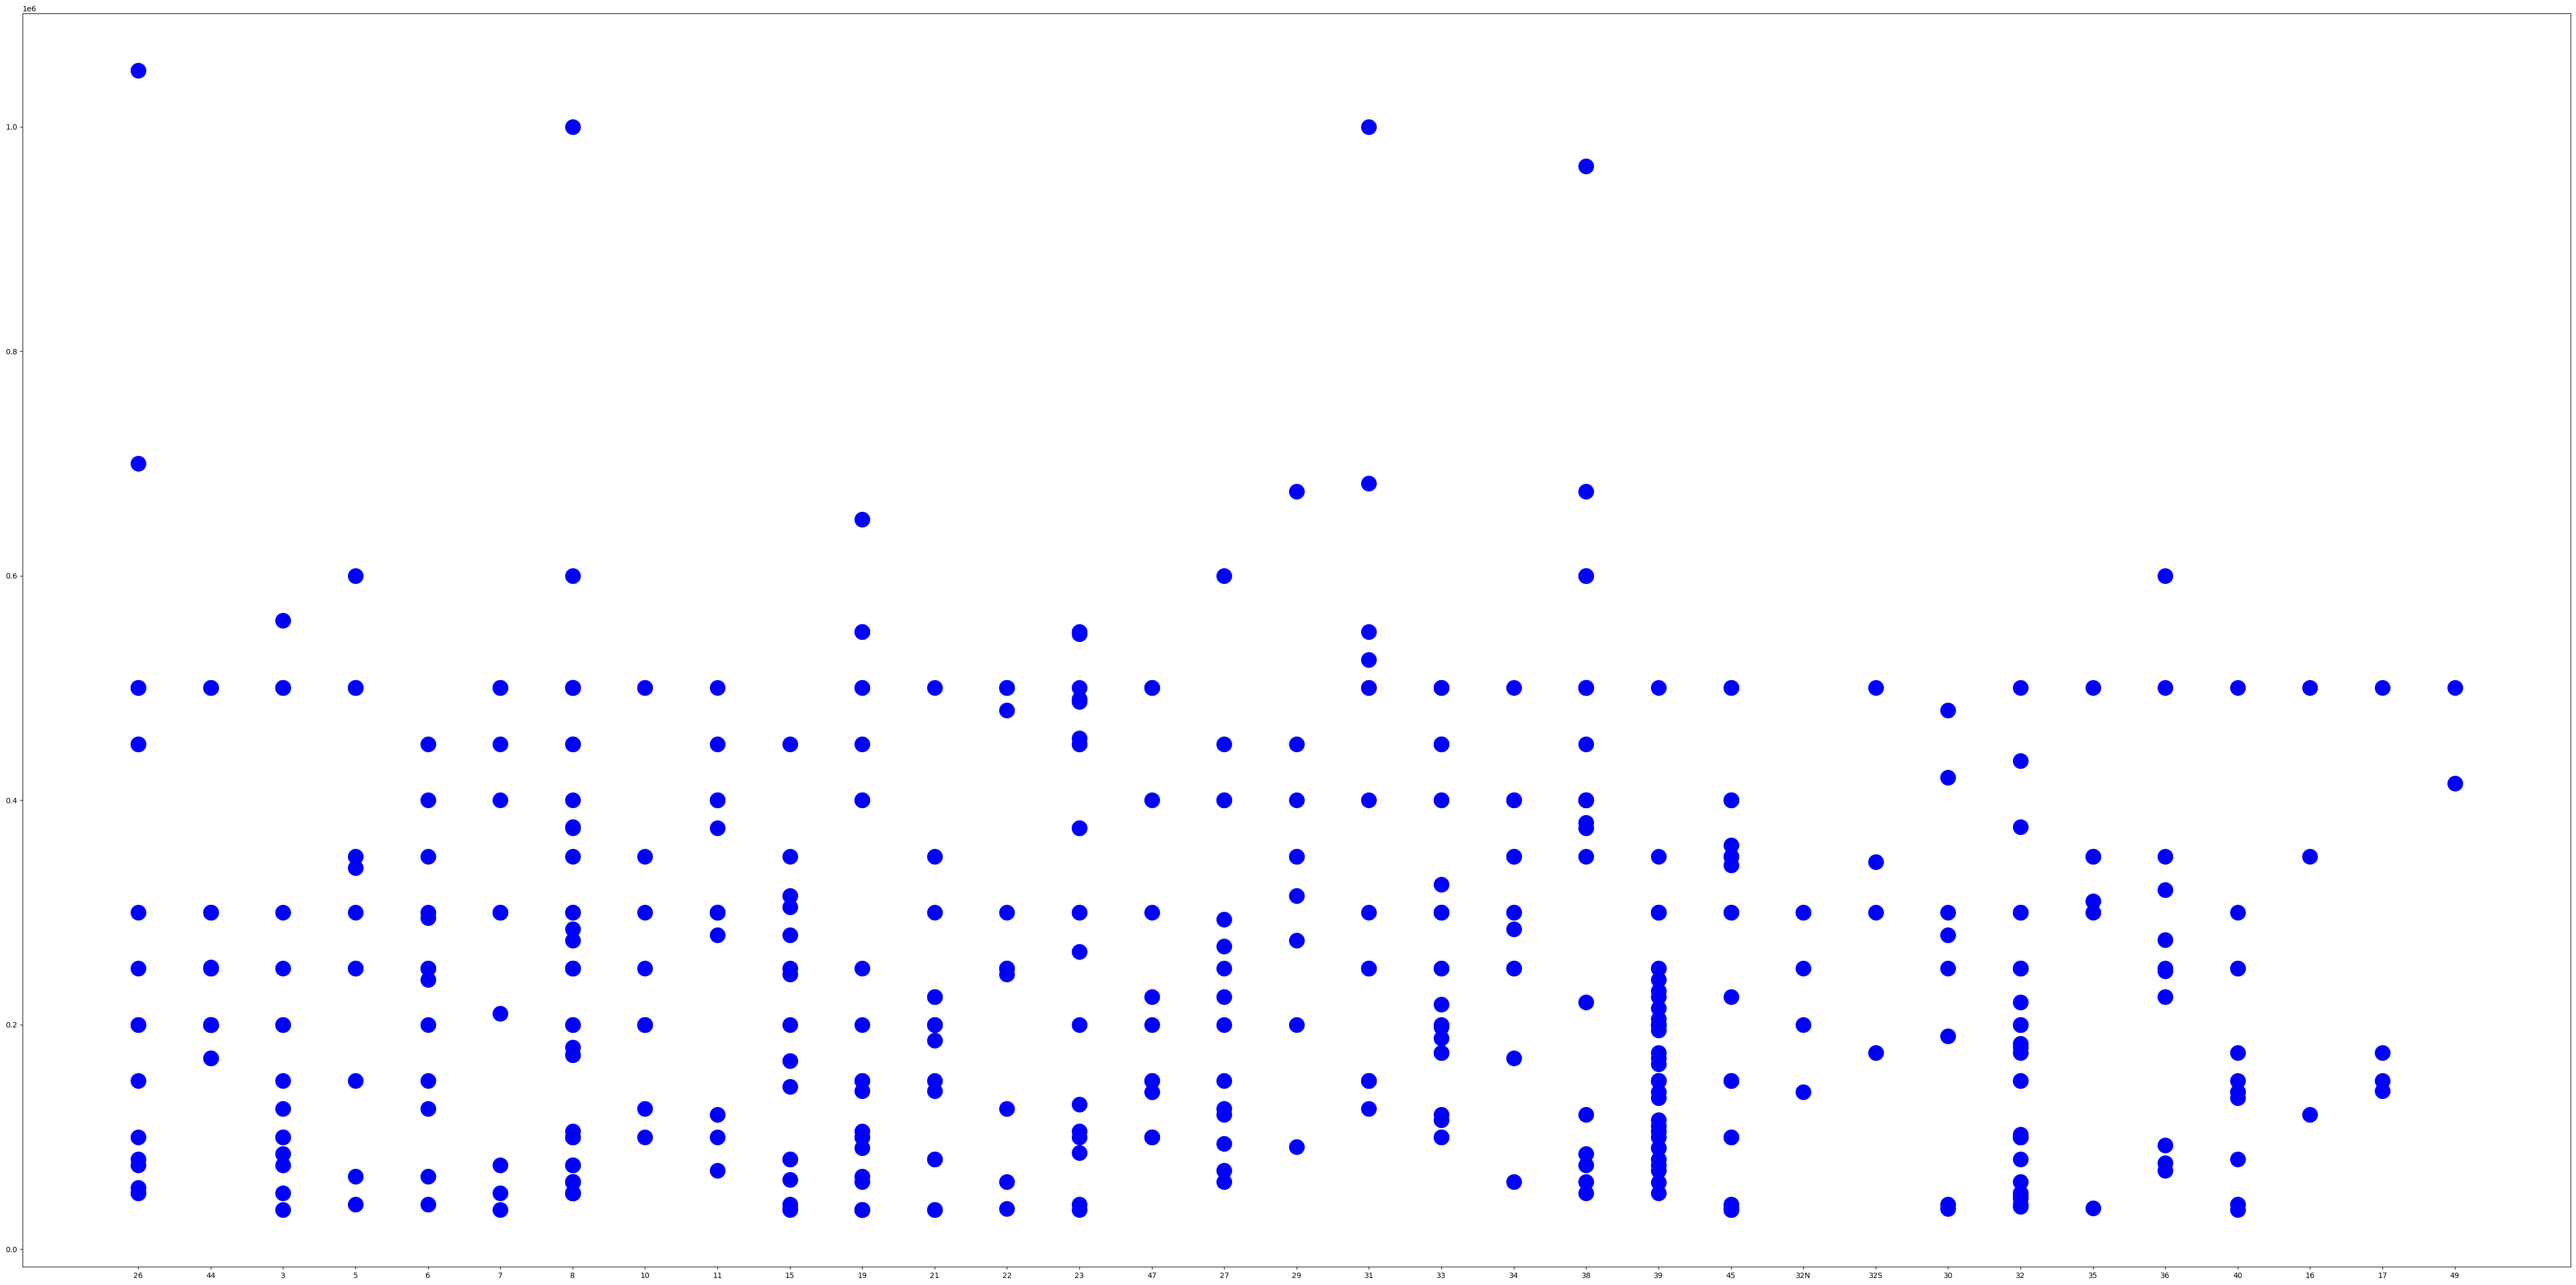

In [11]:
# Best districts for high costs
plt.rcParams["figure.figsize"] = [48,24.0]
plt.rcParams["figure.autolayout"] = True
# x is district council || y is cost
current_df = winners.drop(columns=["Winner", "Category"])
plt.plot(current_df["Council District"], current_df["Cost"], 'bo', markersize=20)
# current_df.hist(bins=100)

plt.show()

Text(0.5, 1.0, 'Total amount of winners in each council district')

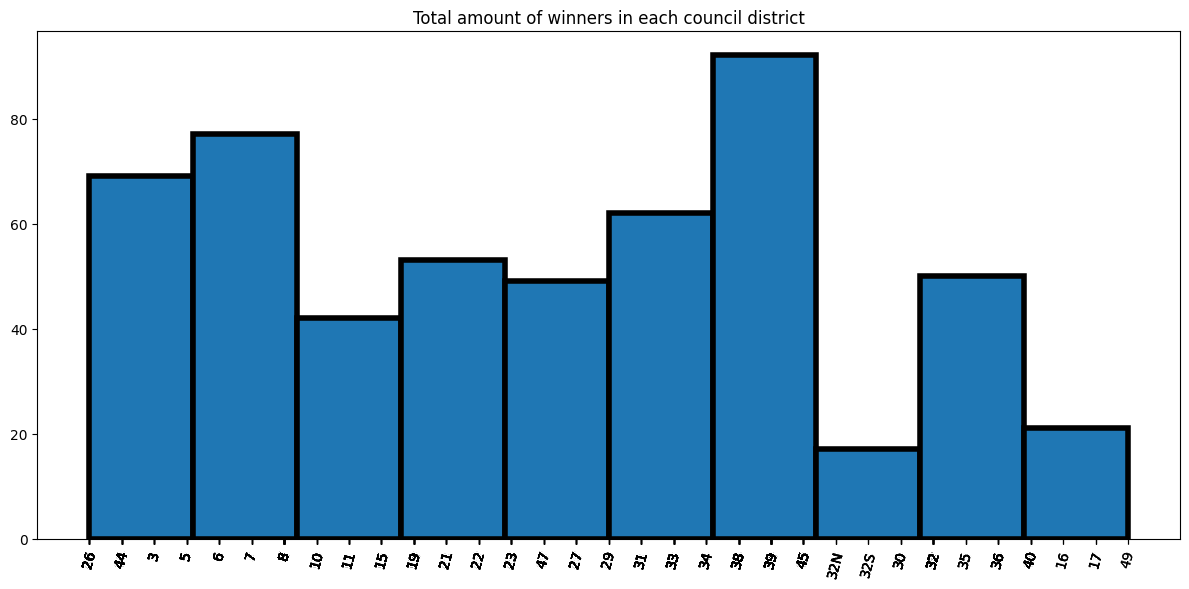

In [371]:
# Most winners in council district
# grouped in the best and the worst winners
plt.rcParams["figure.figsize"] = [12.0,6.0]
plt.rcParams["figure.autolayout"] = True
plt.hist(winners['Council District'], edgecolor="black", linewidth=4)
plt.xticks(winners["Council District"], rotation=75, fontsize="medium")
plt.title("Total amount of winners in each council district", fontdict={'fontsize': "large"})